<a href="https://colab.research.google.com/github/LongNguyen1984/TimeSeriesWithPython/blob/main/FindImportantPoints.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Example for Finding peak using Scipy.signal

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.misc import electrocardiogram
from scipy.signal import find_peaks

x = electrocardiogram()[2000:4000]


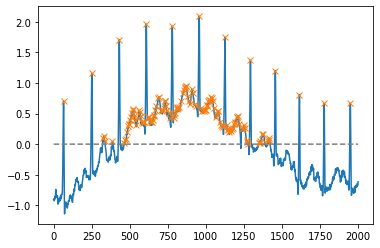

In [19]:
peaks, _ = find_peaks(x, height=0)
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.plot(np.zeros_like(x),"--", color="gray")
plt.show()

[186 180 177 171 177 169 167 164 158 162 172]


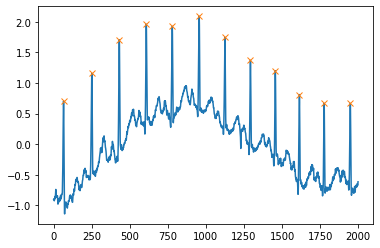

In [22]:
peaks, _ = find_peaks(x, distance=150)
print(np.diff(peaks))

plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.show()

0.545


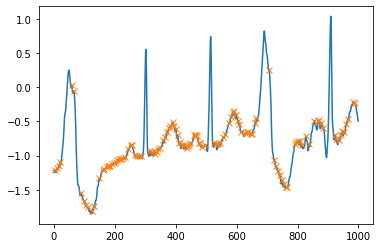

In [40]:
peaks, properties = find_peaks(x, prominence=(None, 0.6))
print(properties["prominences"].max())
plt.plot(x)
plt.plot(peaks, x[peaks],"x")
plt.show()

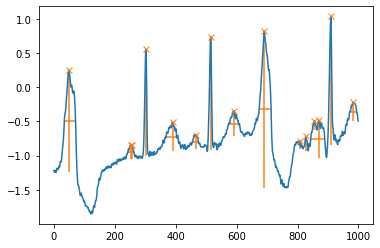

In [42]:
x = electrocardiogram()[17000:18000]
peaks, properties = find_peaks(x, prominence=0.1, width=2)
properties["prominences"], properties["widths"]

plt.plot(x)
plt.plot(peaks, x[peaks],  "x")
plt.vlines(x=peaks, ymin=x[peaks] - properties["prominences"],
           ymax = x[peaks], color = "C1")
plt.hlines(y=properties["width_heights"], xmin=properties["left_ips"],
           xmax=properties["right_ips"], color = "C1")

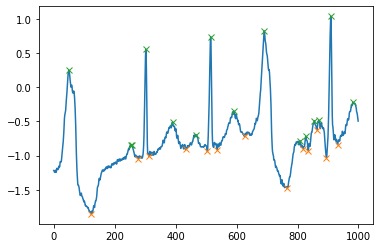

In [46]:
def find_peak_set(x, prominence = 0.1, width = 2):
  max, _ = find_peaks(x, prominence= prominence, width=width)
  min, _ = find_peaks(-x, prominence= prominence, width=width)
  return min, max

min, max = find_peak_set(x)
plt.plot(x)
plt.plot(min, x[min], 'x')
plt.plot(max, x[max],'x')

## This code to implement compressed searching similarity in the book "Data Mining In Time Series Databases", 2004, Marj Last et al.
- Three functions are implemented
  * Find_First
  * Find_Min
  * Find_Max



In [134]:
## Find the first important point fucntion
## input: set of points
## output: indices of the first important points
minSet = []
maxSet = []
peakSet = []
def Find_Important(a, R):
  
  if len(a) != 0:
    peakSet.append(0);

  k = Find_First(a, R)
  print(k)
  if k < len(a) and a[k]> a[0]:
    k = Find_Maximum(a, R, k)
    print(k)
  while (k < len(a)):
    k = Find_Minimum(a, R, k);
    print(k)
    k = Find_Maximum(a, R, k);
    print(k)
  peakSet.append(len(a)-1)
  return peakSet

def Find_First(a, R):
  
  n = len(a) ;
  if n == 0:
    return -1
  else:
    iMin = 1; iMax = 1; i =2
    while i < n and a[i]/a[iMin] < R and a[iMax]/a[i] < R:
      if a[i] < a[iMin]: 
        iMin = i;
      if a[i] > a[iMax]:
        iMax = i;
      i = i + 1
    if iMin < iMax:
      minSet.append(iMin)
      peakSet.append(iMin)
    else:
      maxSet.append(iMax)
      peakSet.append(iMax)
  return i
  
def Find_Minimum(a, R, i):
  n = len(a)
  iMin = i
  while i < n and a[i]/a[iMin] < R:
    if a[i] < a[iMin]:
      iMin = i;
    i = i + 1;
  if i<n and a[iMin] < a[i]:
    minSet.append(iMin)
    peakSet.append(iMin)
  return i

def Find_Maximum(a, R, i):
  n = len(a)
  iMax = i
  while i < n and a[iMax]/a[i] < R:
    if a[i] > a[iMax]:
      iMax = i;
    i = i + 1;
  
  if i<n and a[iMax] > a[i]:
    maxSet.append(iMax)
    peakSet.append(iMax)
  return i
### Find important point




### Print out the set of important peaks

In [136]:
minSet = []
maxSet = []
peakSet = []
peakSet = Find_Important(x, R= 1.5)
print(peakSet, minSet, maxSet)

43
44
61
304
306
510
519
676
713
912
914


IndexError: ignored

In [128]:
peakSet

[0, 3, 33, 72, 296, 297, 390, 519, 674, 713, 714, 902, 969, 997]

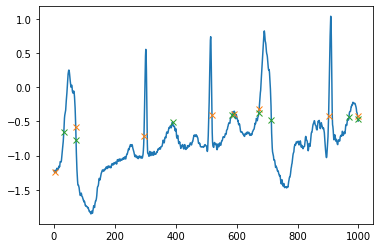

In [123]:
plt.plot(x)
plt.plot(minSet, x[minSet], 'x')
plt.plot(maxSet, x[maxSet], 'x')
